<a href="https://colab.research.google.com/github/4nands/Perceptron/blob/main/ds1023b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

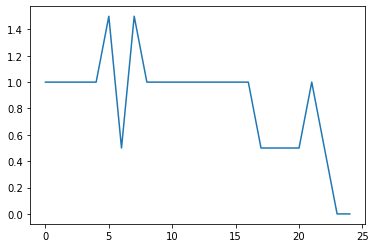

In [ ]:
import numpy as np

def sse(y,t):
  return np.sum((y-t)**2)*0.5

#パーセプトロン
class Perceptron:
  def __init__(self):
    #コンストラクタ
    self.W=np.random.randn(2,1) #重み
    self.b=0                     #バイアス
    self.X=None                     #入力データの保存

  def forward(self,X):
    #順伝播
    a=np.matmul(X,self.W)+self.b    #リニアーな変換
    y=(a>0)*1                       #ステップ関数
    self.X=X                        #入力データの保存
    return y
  def step(self,X,t):
    y=self.forward(X)
    delta=y-t
    self.backward(delta)
    return sse(y,t)
  def backward(self,delta):
    #勾配
    dW=np.matmul(self.X.T,delta)
    db=np.sum(delta)
    
    #SGD
    self.W-=0.1*dW
    self.b-=0.1*db
  def fit(self,X,t,epochs=100):
    #学習
    loss=[]
    for i in range(epochs):
      l=self.step(X,t)
      loss.append(l)
    return loss



np.random.seed(0)

X=np.array([[0,0],[1,0],[0,1],[1,1]])   #入力データ
t=np.array([[1],[1],[1],[0]])

model=Perceptron()   #パーセプトロンを実体化する
loss=model.fit(X,t,epochs=25)

plt.plot(loss)

In [ ]:
x=[1,3]
print(x)
x.append(4)
print(x)

[1, 3]
[1, 3, 4]


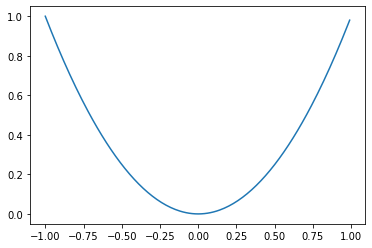

In [ ]:
import matplotlib.pyplot as plt

x=np.arange(-1,1,0.01)
y=x**2

plt.plot(x,y)
plt.show()


In [ ]:
for i in range(10):
  print(i)

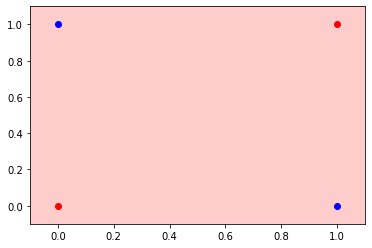

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def decision_regions(x,y,model):
  
  #平面を分割する。
  
  #グリッドの作成
  x1=np.arange(-0.1,1.1,0.02)   #横軸
  x2=np.arange(-0.1,1.1,0.02)   #縦軸
  xx1,xx2=np.meshgrid(x1,x2)    #メッシュ
  z=np.array([xx1.ravel(),xx2.ravel()]).T   #座標点の作成
  
  
  Z=model.forward(z).reshape(xx1.shape)   #各座標点を分類する

  plt.contourf(xx1,xx2,Z,alpha=0.2,cmap=ListedColormap(['red','blue'])) #平面の分割

  y=y.flatten()

  #データをプロットする。
  plt.scatter(x[y==0,0],x[y==0,1],c='red')
  plt.scatter(x[y==1,0],x[y==1,1],c='blue')
  
#動作の確認
decision_regions(X,t,model)